Model filename: ../models/facenet/20180408-102900/20180408-102900.pb


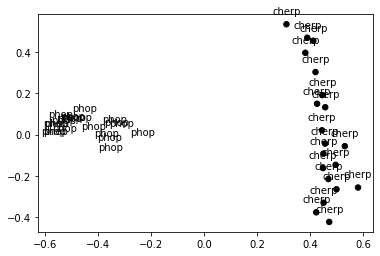

In [23]:
#source: https://github.com/davidsandberg/facenet

import sys
sys.path.append('../models/facenet')

from facenet import FaceNet
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

facenet = FaceNet('../models/facenet/20180408-102900/20180408-102900.pb')

name = input('input name: ')
index = pd.read_csv('../datasets/' + name + '-index.csv', sep=',')
label_text = index.values[:,1]

dataset = pd.read_csv('../datasets/prc_' + name + '.csv', sep=',')
ids = dataset.values[:,0]
filenames = dataset.values[:,1]
labels = dataset.values[:,2].astype('str')

images = []
for i in range(len(ids)):
    img = cv2.imread(filenames[i])
    img = cv2.resize(img, (160,160), interpolation=cv2.INTER_LINEAR)

    embedding = facenet.get_embedding(img)
    images.append(np.ravel(embedding))



pca = PCA(n_components=2)
features = pca.fit_transform(images)

plt.figure()
X_t = np.transpose(features)

plt.scatter(X_t[0], X_t[1], c=labels, s=30, cmap=plt.cm.Paired)

for i in range(len(labels)):
       plt.annotate(label_text[int(labels[i])], (X_t[0,i], X_t[1,i]), textcoords='offset points', xytext=(0,10), ha='center')
plt.show()

